Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


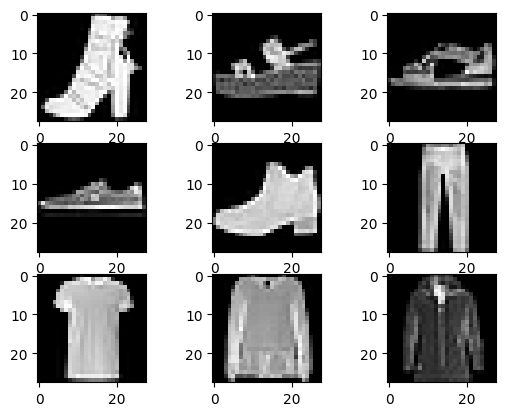

Test Accuracy: 90.033


Test Accuracy: 90.742


Test Accuracy: 90.792


Test Accuracy: 90.508
Test Accuracy: 89.342


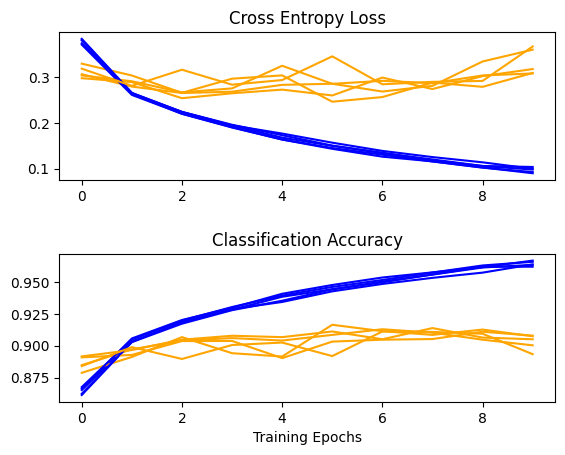

Accuracy: mean=90.283 std=0.542, n=5


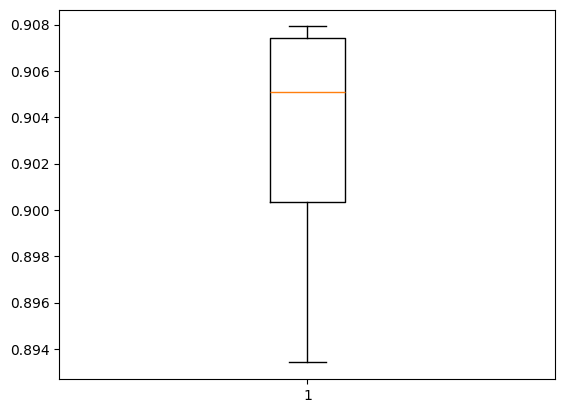

In [4]:
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import BatchNormalization

# Part 1: load Fashion-MNIST dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first 9 to 19 images
for i in range(9):
    plt.subplot(330 + 1 + i) # define subplot
    # plot raw pixel data
    plt.imshow(trainX[i+11], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()
 
# Part 2: Function to load train and test MNIST dataset ------------------------------
def load_dataset():
    # load MNIST-dataset as grayscale image
    (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
    # reshape dataset to have heightxwidthxchannel dimension
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # "to_categorical" to encode class-values to class-vector
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
 
# Part 3: Perform Image Normalization --------------------------------------------------
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize grayscale imag to range [0-1]
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
 
# Part 4: define Convolutional Neural Network (CNN) model -----------------------------------------------------
def define_model():
    model = Sequential()
    # "Conv2D": Construct Convolution Layer
    model.add((Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))))
    model.add(BatchNormalization()) # "BatchNormalization": Perform batch normalization to speed up training
    # "MaxPooling2D": Create Pooling Layer using max function
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten()) # "Flatten": Rearrange into 1-dimension
    # "Dense": Construct Hidden-layer feedforward network
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization()) # "BatchNormalization": Perform batch normalization to speed up training
    # "Dense": Construct Output-layer feedforward network
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# Part 5: train & evaluate a model using k-fold cross-validation ---------------------------------------------
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1) # prepare k-fold cross validation
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model() # define model
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model for training neural network
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0) # evaluate trained model with test dataset
        print('Test Accuracy: %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories
 
# Part 6: plot diagnostic learning curves ----------------------------------------------------------
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1), plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2), plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.xlabel('Training Epochs')
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()
# Part 7: plot summarize model performance ----------------------------------------------------------
def summarize_performance(scores):
    # print summary in terms of mean and standard deviation
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()
    
# Part 8: Main Program - run the test harness for evaluating a model  -------------------------------
def run_test_harness():
    # load MNIST-dataset as grayscale image
    trainX, trainY, testX, testY = load_dataset()
    # Perform Data-Normalization for all grayscale image
    trainX, testX = prep_pixels(trainX, testX)
    # Train & Evaluate CNN model
    scores, histories = evaluate_model(trainX, trainY)
    # plot learning curves from each k-fold training
    summarize_diagnostics(histories)
    # plot summarize estimated performance as mean & standard deviation
    summarize_performance(scores)
    
# Run "run_test_harness" function for Main Program
run_test_harness()